Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company_data["sales"]="<=7.5"
company_data.loc[company_data["Sales"]>=7.5,"sales"]="High Sales"
company_data.loc[company_data["Sales"]<=7.5,"sales"]="Low Sales"

In [6]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High Sales
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low Sales
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low Sales
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low Sales


In [7]:
categ = ['ShelveLoc','Urban','US','sales']

# Encode Categorical Columns
le = LabelEncoder()
company_data[categ] = company_data[categ].apply(le.fit_transform)

In [8]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [10]:
x = company_data.drop(labels=['Sales','sales'], axis=1)
y = company_data[['sales']]

In [11]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [12]:
y.head()

,sales
0,0
1,0
2,0
3,1
4,1


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [36]:
x_train.shape,x_test.shape

((320, 10), (80, 10))

In [37]:
dt_model=DecisionTreeClassifier(criterion="entropy",max_depth=5)
dt_model.fit(x_train,y_train)
y_pred_train=dt_model.predict(x_train)

In [38]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       151
           1       0.85      0.91      0.87       169

    accuracy                           0.86       320
   macro avg       0.87      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [40]:
print(confusion_matrix(y_train,y_pred_train))

[[123  28]
 [ 16 153]]


In [41]:
accuracy_score(y_train,y_pred_train)

0.8625

In [42]:
y_pred_test=dt_model.predict(x_test)

In [43]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        47
           1       0.66      0.82      0.73        33

    accuracy                           0.75        80
   macro avg       0.75      0.76      0.75        80
weighted avg       0.77      0.75      0.75        80



In [44]:
print(confusion_matrix(y_test,y_pred_test))

[[33 14]
 [ 6 27]]


In [45]:
accuracy_score(y_test,y_pred_test)

0.75

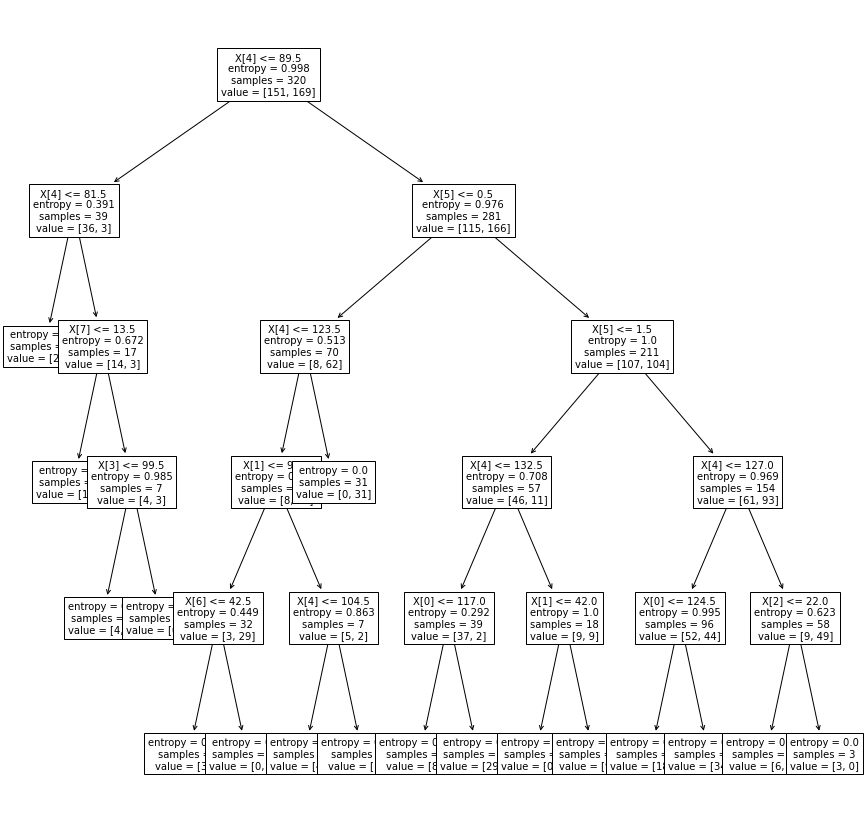

In [46]:
plt.figure(figsize=(15 , 15 ))
tree.plot_tree(dt_model , fontsize= 10);

### With Criterion as Gini Index

In [47]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
y_pred_train1= model_gini.predict(x_train)

In [49]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       151
           1       0.89      0.83      0.86       169

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [50]:
print(confusion_matrix(y_train,y_pred_train1))

[[133  18]
 [ 28 141]]


In [51]:
accuracy_score(y_train,y_pred_train1)

0.85625

In [53]:
y_pred_test1=model_gini.predict(x_test)

In [54]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.83      0.74      0.79        47
           1       0.68      0.79      0.73        33

    accuracy                           0.76        80
   macro avg       0.76      0.77      0.76        80
weighted avg       0.77      0.76      0.76        80



In [56]:
print(confusion_matrix(y_test,y_pred_test1))

[[35 12]
 [ 7 26]]


In [57]:
accuracy_score(y_test,y_pred_test1)

0.7625

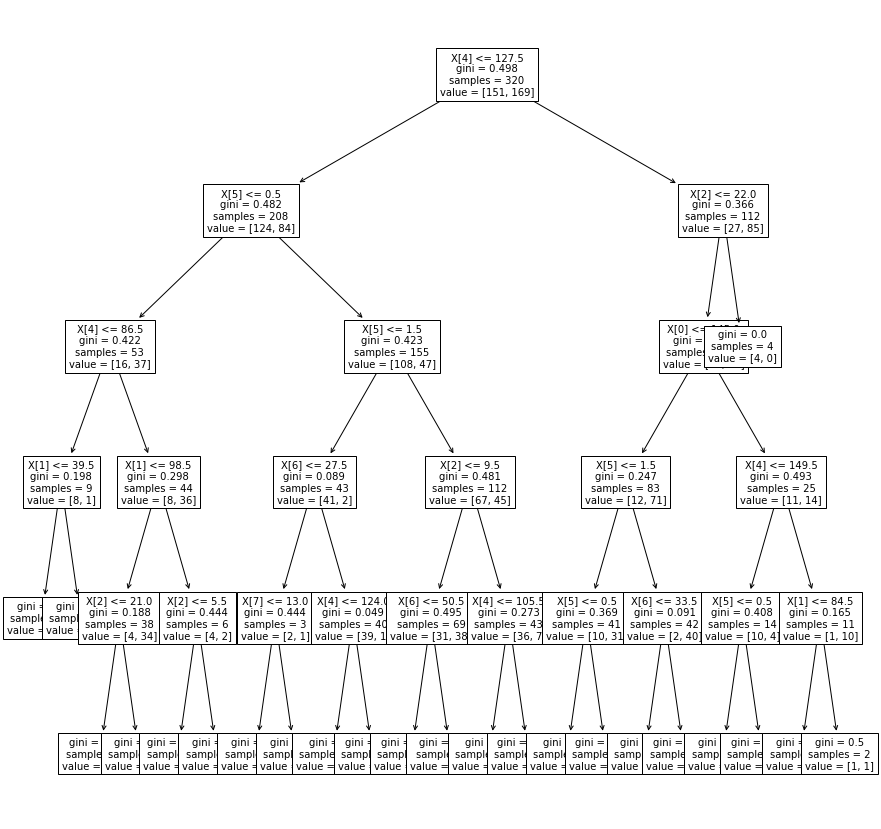

In [58]:
plt.figure(figsize=(15 , 15 ))
tree.plot_tree(model_gini , fontsize= 10);

### No significant change is observed between the Entropy and Gini index criteria